In [2]:
import sys
import os
from os.path import isfile, join
import re
sys.path.append("/home/jemonet/Documents/These/Code/Graphes")
sys.path.append("/user/jemonet/home/Documents/These/stimuli")
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from figure_lib.src.data_transform.GraphDF import GraphDF
# from figure_lib.src.make_figure.figure import Figure
import seaborn as sns
import matplotlib as mpl

import figure_lib.src.data_transform.GraphDF as gdf
import figure_lib.src.make_figure.figure as fg
import stim_help_functions as hf


#%matplotlib qt
%matplotlib inline

In [116]:
print("FS :",np.load("/user/jemonet/home/Documents/These/Code/2DModel-Roques2020-updated/data/FS-cell_CONFIG1_fit.npy"),"\n")
print("RS :",np.load("/user/jemonet/home/Documents/These/Code/2DModel-Roques2020-updated/data/RS-cell_CONFIG1_fit.npy"),"\n")

FS : [-5.39174436e-02  4.07642701e-03  1.69747036e-03  9.11869386e-04
 -3.43496494e-05  5.00307136e-04  6.52314112e-05  2.42498031e-05
 -2.34327870e-03 -1.15712989e-04  1.48402587e-04] 

RS : [-0.05471508  0.00764454 -0.00462723  0.00171283 -0.00010711  0.00072054
 -0.00200464  0.00011756  0.00561326 -0.00099436 -0.00287604] 



In [58]:
path = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Retinocortical/all_cells_noGC_noAma_noSurr_extdrive0,002_Lexc10.csv"

df = gdf.GraphDF(path,0.00878,60,20,20)

df_exc = df.isolate_dataframe_byoutputs("v_e")
df_inh = df.isolate_dataframe_byoutputs("v_i")

In [106]:
m = df_exc.data.max().max()
df_exc.data.max().idxmax()
df_exc.data.loc[:,"v_e (1389) CorticalExcitatory"].idxmax()

0.057526560000000004

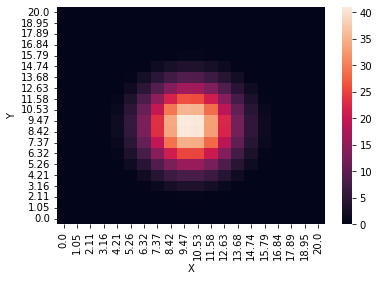

In [59]:
data_t = df_inh.data.iloc[399]

x = [round(i,2) for i in np.linspace(20,0,20)]
y = [round(i,2) for i in np.linspace(0,20,20)]

new_df = pd.DataFrame(0,index=x, columns=y)
new_df.index.name = "Y"
new_df.columns.name = "X"

for x in range(20):
    for y in range(20):
        new_df.iloc[19-y,x] = data_t.iloc[20*x + y]

plot = sns.heatmap(new_df)
fig = plot.get_figure()

In [68]:
(new_df.max().max()*np.exp(-1)-10)/np.sqrt(2)

3.611874940320273

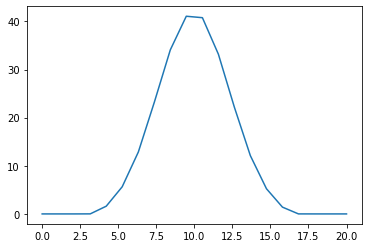

In [61]:
plt.plot(new_df.iloc[10])
#f = lambda dist_sqr, sigma: (np.exp(-1.0 * dist_sqr / (2.0 * sigma*sigma)) / (1-np.exp(-(25*sigma*sigma)/2.0))*(2. * np.pi * sigma*sigma))

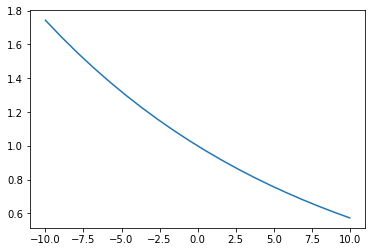

In [ ]:
l = np.linspace(-10,10,20)
new_l = []
for elt in l:
    new_l += [f(elt,3)]
plt.plot(l, new_l)

In [30]:
df_exc

---------------------------------------------

### Parameters :
  - dt = 0.00878s
  - frame rate = 60Hz
  - Grid dimension : 20x20 cells


,v_e (1389) CorticalExcitatory VC 300
Time,
0.0000,1.717000e+00
0.0004,1.584990e+00
0.0008,1.463130e+00
0.0012,1.350640e+00
0.0016,1.246800e+00
...,...
0.4448,7.081580e-18
0.4452,6.537120e-18
0.4456,6.034520e-18
